In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [23]:
def make_ini_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2CNet(positions)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/'
    
    output_path = save_dir+str(t)+'.png'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

def ind2CNet(ind_list):

    image_tensor =  np.zeros((512, 512),dtype=np.uint8)

    # Define the radius of the ball
    radius = 5

    # Define the color of the ball (white)
    #color = (255, 255, 255)

    # Define the list of positions
    positions = ind_list
    #print('ind',ind_list)



    # Loop over the positions and draw a circle around each one
    for position in positions:
        # Convert the position to integer coordinates
        #try:
        x, y = int(position[0]), int(position[1])

        # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = 255
                    except IndexError:
                        pass#print('IndErr',i,j)
        #except: 
           # pass


    return image_tensor

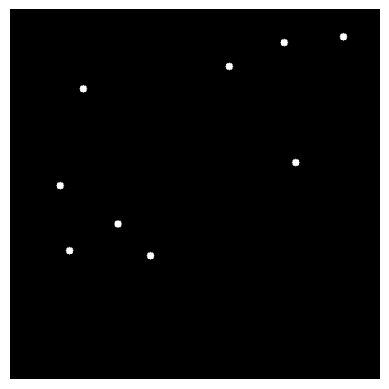

In [24]:
path_GT='2_GT'

make_ini_pic(path_GT, t=30)